# Final Project Presentation

## Team Member
SihYi Lin(sihyiyl2)

## Purpose
By finding out the relation between each country’s policies and their COVID-19 confirmed rate change, to know which policy, treatment would be the helpful to control the outbreak

## Data Source
https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

## Hypothesis
(1) Mass test could help decrease the outbreak efficiently
(2) Countries that people does wearing mask would have lower rate of confirmed number

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
from sklearn.linear_model import LinearRegression

In [24]:
# Read Data
data = pd.read_csv('./data/covid_19_data.csv')
# convert string into date
data['ObservationDate'] = pd.to_datetime(data['ObservationDate'])
world_mask = pd.read_csv('./data/world_mask.csv')
world_mask['天'] = pd.to_datetime(world_mask['天'])
italy_mask = pd.read_csv('./data/italy_mask.csv')
italy_mask['天'] = pd.to_datetime(italy_mask['天'])

In [3]:
def combine_state(country):
    """
    Combining the confirmed number of different states in a country into total number
    """
    data_by_country = data[data['Country/Region'] == country]
    data_by_country = pd.DataFrame(data_by_country.groupby(['ObservationDate']).sum())
    data_by_country['ObservationDate'] = data_by_country.index
    return data_by_country

def extract_country(country_name):
    """
    Extract certain country from the world dataset
    """
    country = data[data['Country/Region'] == country_name]
    country = country.reset_index()
    return country

def calculate_start_outbreak_date(country):
    """
    Automatically calculate when does the COVID-19 started to outbreak at the certain country
    """
    rate = 0
    i = 0
    while rate < 10:
        today = country['ObservationDate'][i]
        tomorrow = today + timedelta(1)
        tomorrow = tomorrow.strftime('%Y/%m/%d')
        
        today_confirmed = country['Confirmed'][country['ObservationDate'] == today]
        tomorrow_confirmed = country['Confirmed'][country['ObservationDate'] == tomorrow]
        
        rate = int(tomorrow_confirmed) - int(today_confirmed)
        i += 1
    return country['ObservationDate'][i]

def fit_regression(X_length, y):
    """
    Helper function of fitting regression, return score and coefficient
    """
    X = [i for i in range(X_length)]
    v = np.ones((X_length, 1))
    X = np.c_[v,X]
    reg = LinearRegression().fit(X, y)
    return reg.score(X, y), reg.coef_[1]

def calculate_rate(country, start_date, end_date):
    """
    Calculate the given country's increasing rate of COVID-19 confirmed number, in the given period
    """
    country = country[country['ObservationDate'] > start_date]
    country = country[country['ObservationDate'] <= end_date]
    
    score, rate = fit_regression(country.shape[0], country['Confirmed'])
    
    print('Accuracy:', score, '%')
    print('rate:', rate)
    
def calculate_date_of_getting_better(country):
    

### Extract some representative countries

In [279]:
US = combine_state('US')
France = combine_state('France')
Japan = extract_country('Japan')
Italy = extract_country('Italy')
Korea = extract_country('South Korea')
Taiwan = extract_country('Taiwan')
Germany = extract_country('Germany')
UK = extract_country('UK')
Poland = extract_country('Poland')

In [28]:
germany_mask = world_mask[['天', 'masque: (法國)']]
korea_mask = world_mask[['天', '마스크: (南韓)']]

In [27]:
world_mask

,天,Mundschutz: (德國),masque: (法國),mask: (美國),口罩: (台灣),마스크: (南韓)
0,2020-01-01,<1,1,1,<1,1
1,2020-01-02,<1,1,1,1,1
2,2020-01-03,<1,1,1,<1,1
3,2020-01-04,<1,1,1,1,1
4,2020-01-05,<1,2,2,1,1
...,...,...,...,...,...,...
125,2020-05-05,4,31,8,10,3
126,2020-05-06,3,25,8,9,4
127,2020-05-07,3,22,8,8,4
128,2020-05-08,3,21,8,7,4


In [ ]:
## Plot each country's rate

In [4]:
## Plot each country's rate

,SNo,Confirmed,Deaths,Recovered,ObservationDate
ObservationDate,,,,,
2020-01-22,32,1.0,0.0,0.0,2020-01-22
2020-01-23,70,1.0,0.0,0.0,2020-01-23
2020-01-24,237,2.0,0.0,0.0,2020-01-24
2020-01-25,319,2.0,0.0,0.0,2020-01-25
2020-01-26,818,5.0,0.0,0.0,2020-01-26
...,...,...,...,...,...
2020-04-30,1170704,1069424.0,62996.0,153947.0,2020-04-30
2020-05-01,1189438,1103461.0,64943.0,164015.0,2020-05-01
2020-05-02,1208172,1132539.0,66369.0,175382.0,2020-05-02


## Plot each country's rate

### Germany

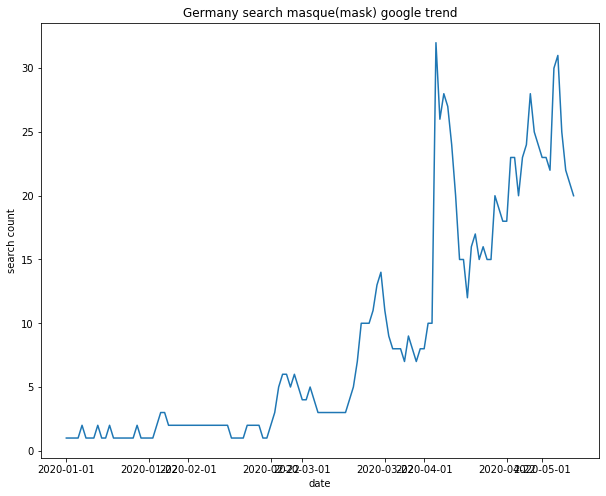

In [32]:
plt.figure(figsize=(10, 8))
plt.plot(germany_mask['天'], germany_mask['masque: (法國)'])
plt.title('Germany search masque(mask) google trend')
plt.xlabel('date')
plt.ylabel('search count')
plt.show()

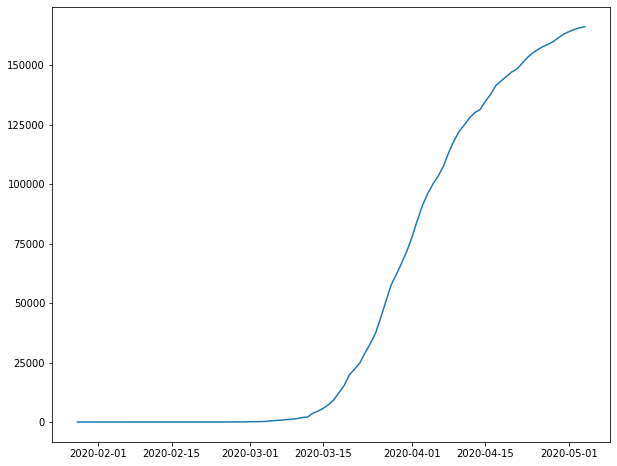

outbreak at: 2020-02-26 00:00:00


In [326]:
plt.figure(figsize=(10, 8))
plt.plot(Germany['ObservationDate'], Germany['Confirmed'])
plt.title('Germany COVID-19 confirmed number')
plt.xlabel('date')
plt.ylabel('search count')
plt.show()

outbreak_date = calculate_start_outbreak_date(Germany)
print('outbreak at:', outbreak_date)

calculate_rate(Germany, outbreak_date, '2020/04/10')
calculate_rate(Germany, '2020/04/10', '2020/05/04')

* Start doing more than 100,000 tests daily at early April
* daily rate of confirmed number: 2990 -> 1780

### US

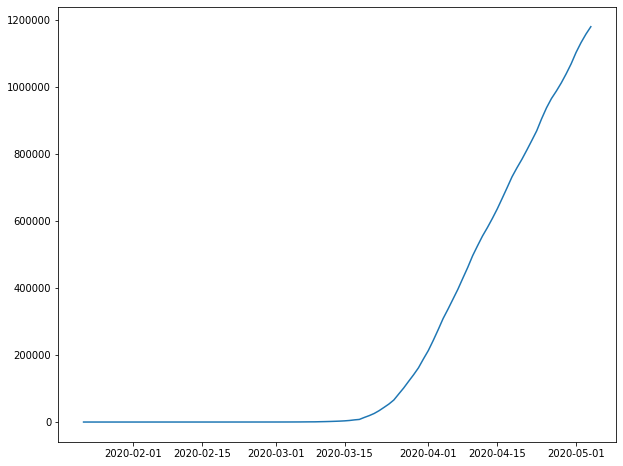

outbreak at: 2020-02-21 00:00:00


In [284]:
plt.figure(figsize=(10, 8))
plt.plot(US.index, US['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(US)
print('outbreak at:', outbreak_date)

* daily rate of confirmed number: 17397
* US has tested at just 74 percent the rate of South Korea

### Italy

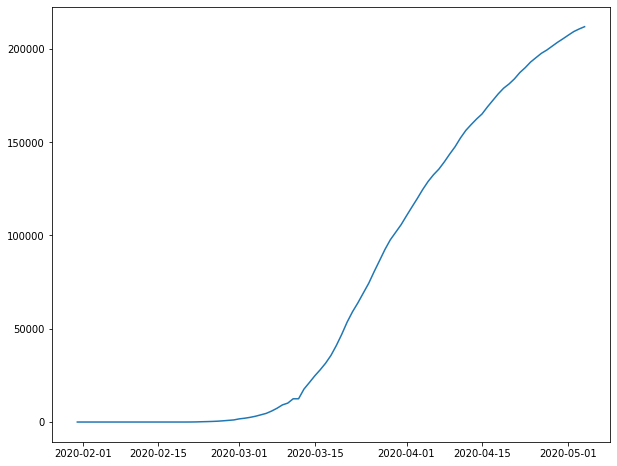

outbreak at: 2020-02-21 00:00:00


In [286]:
plt.figure(figsize=(10, 8))
plt.plot(Italy['ObservationDate'], Italy['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(Italy)
print('outbreak at:', outbreak_date)

### Korea

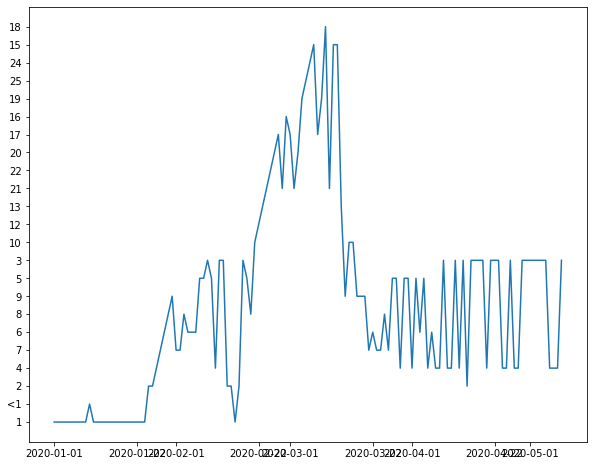

In [30]:
plt.figure(figsize=(10, 8))
plt.plot(korea_mask['天'], korea_mask['마스크: (南韓)'])
plt.show()

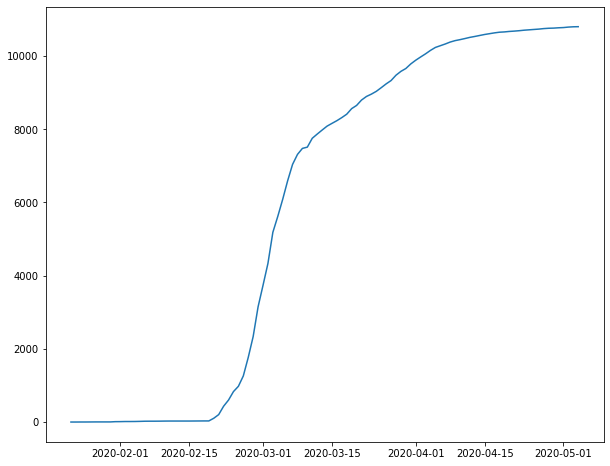

outbreak at: 2020-02-20 00:00:00


In [356]:
plt.figure(figsize=(10, 8))
plt.plot(Korea['ObservationDate'], Korea['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(Korea)
print('outbreak at:', outbreak_date)

In [357]:
calculate_rate(Korea, outbreak_date, '2020/03/05')
calculate_rate(Korea, '2020/03/05', '2020/04/01')
calculate_rate(Korea, '2020/04/01', '2020/05/04')

Accuracy: 0.9557968962673828 %
rate: 482.11648351648347
Accuracy: 0.9817747131667831 %
rate: 110.2643467643468
Accuracy: 0.8649554186899557 %
rate: 21.647727272727277


* By mid-March, 270,000 South Koreans had been tested
* daily rate of confirmed number: 482 -> 110 -> 21

### Taiwan

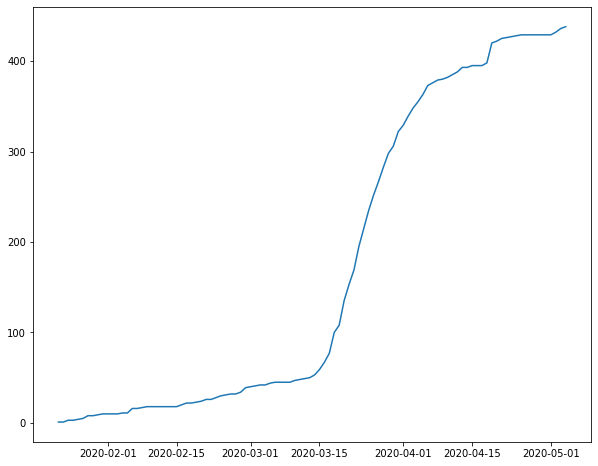

outbreak at: 2020-03-17 00:00:00


In [288]:
plt.figure(figsize=(10, 8))
plt.plot(Taiwan['ObservationDate'], Taiwan['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(Taiwan)
print('outbreak at:', outbreak_date)

### France

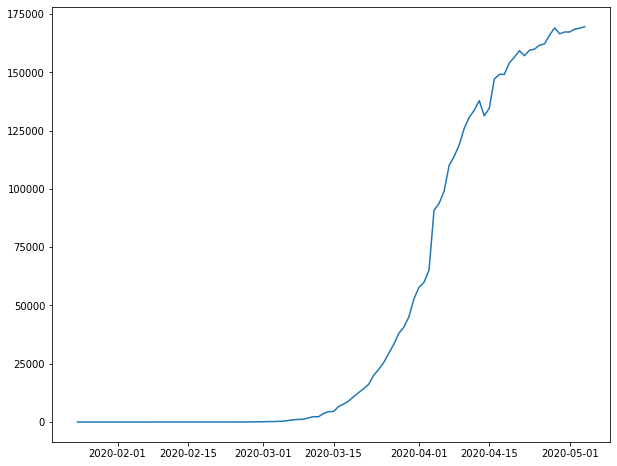

outbreak at: 2020-02-27 00:00:00


In [353]:
plt.figure(figsize=(10, 8))
plt.plot(France['ObservationDate'], France['Confirmed'])
plt.show()

outbreak_date = calculate_start_outbreak_date(France)
print('outbreak at:', outbreak_date)

In [354]:
calculate_rate(France, outbreak_date, '2020/04/10')
calculate_rate(France, '2020/04/11', '2020/05/04')

Accuracy: 0.7923694963231469 %
rate: 2756.8917245545144
Accuracy: 0.8793493727766759 %
rate: 1699.0108695652175


In [ ]:
## Current Result
